# Project Forensics

---

## Setup


### Working Directory

This just helps with using local imports from the larger project to the notebook.

In [1]:
cd ../

/Users/chrismessier/work/behaviorally


### Imports

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import os

from google.protobuf.struct_pb2 import Struct
from clarifai_grpc.channel.clarifai_channel import ClarifaiChannel
from clarifai_grpc.grpc.api import resources_pb2, service_pb2, service_pb2_grpc
from clarifai_grpc.grpc.api.status import status_pb2, status_code_pb2

#### Plotting Config

In [4]:
%matplotlib inline
sns.set(
    style='darkgrid'
)

### Methods

In [5]:
def load_spreadsheet(f):
    pass

### Client Initialization

In [6]:
channel = ClarifaiChannel.get_json_channel()
stub = service_pb2_grpc.V2Stub(channel)

In [7]:
API_KEY = None

In [8]:
metadata = (('authorization', f'Key {API_KEY}'),)  # key value referenced from config module

## Analysis

### Background

### Spreadsheets

There were three spreadsheets shared with me, which I have uploaded to the following Google Sheets:

- [[BEHAVIORALLY] ONS Validation_dcs_processed_v1.3.xlsx](https://docs.google.com/spreadsheets/d/12aDefcKhb9-LSILRo0t5ttLLxvxfe81ft-MYJhLbVYk/edit?usp=sharing)
- [[BEHAVIORALLY] IRI Data Product List_3.21.22.xlsx](https://docs.google.com/spreadsheets/d/1HCsjUscUtgbhRXdIfxcJCENzz2ZhwicnJcwcEoZuoYw/edit#gid=1323785198)
- [[BEHAVIORALLY] Behaviorally - Report 4.18.22[8].xlsx](https://docs.google.com/spreadsheets/d/169Bu7yhN6tuTpAgQAr2BV-l8MBxCwEpvAVkR2PDjZBA/edit?usp=sharing)

As well as one `.eml` file:

- 'data/Re- Respondent database request.eml'

Upon quick inspection, the `.eml` file appears to be email records.
I saw the name "Durga" which was also the name of one of the correspondents on the email chain Bryan forwarded to me as well.
I've been told to ignore this file for the time being.

In [9]:
doc_1 = '/Users/chrismessier/work/behaviorally/data/Behaviorally - Report 4.18.22[8].xlsx'
doc_2 = '/Users/chrismessier/work/behaviorally/data/IRI Data Product List_3.21.22.xlsx'
doc_3 = '/Users/chrismessier/work/behaviorally/data/ONS Validation_dcs_processed_v1.3.xlsx'

In [10]:
d = pd.read_excel(doc_3, sheet_name=None)  # coerce it to parse all sheets and return a dict

After checking on this the 'Report' spreadsheet, isn't super well organized by sheets, as it's just incremental integers.
I will need to dig into the structure a bit...

After looking into the sheets, each of these is a report.
In each sheet there's more information on the associated report.
What's more important though, is the information I got from Bryan about the project.

There are two files of interest, [`doc_1`](https://docs.google.com/spreadsheets/d/12aDefcKhb9-LSILRo0t5ttLLxvxfe81ft-MYJhLbVYk/edit?usp=sharing)

Suddenly, a wild spreadsheet appeared!

> [ONS_output_Tony_Round 1.xlsx](https://docs.google.com/spreadsheets/d/1ft-XNY-UQbcVsivONW7Ig9byVTxBkRHJ/edit?usp=sharing&ouid=116368867705255658120&rtpof=true&sd=true)

Which was downloaded locally, and can be set...

In [11]:
doc_4 = '/Users/chrismessier/work/behaviorally/data/ONS_output_Tony_Round 1.xlsx'

These are the results that @tony(?) got when running the model(s) for Behaviorally.
What is of interest is a correlation between these scores, and the revenue(?) that can be found somewhere in [these](https://docs.google.com/spreadsheets/d/169Bu7yhN6tuTpAgQAr2BV-l8MBxCwEpvAVkR2PDjZBA/edit?usp=sharing) reports.
I'm going to start with getting the scores in first...

The scores are contained in [this spreadsheet](https://docs.google.com/spreadsheets/d/1qJ4lYdJzrzfmzTB2v7BVMAzO3XZZXcpX/edit?usp=sharing&ouid=116368867705255658120&rtpof=true&sd=true).

According to @bryan there is only one sheet of interest, `'ONS_output_Tony'`, so we will simply parse it accordingly: no need for a fancy-pants parser. 😒


### `ONS_output_Tony_Round 1.xlsx:ONS_output_Tony` 

In [12]:
# @mess: @bryan, seeing as this may be the first time you are reviewing my work in this, I want to work flow explicit.  
# I'm going to be using non-descript 'df' locally for testing, once a snippet/script is complete, that will be abstracted into a function/method/object at the top of the notebook.
# The purpose of this is to provide easy 'breadcrumbs' for future iterations, which should always involve moving these completed snippets to stand-alone modules.
# It is at this point that documentation standards _should_ be enforced, but we're nowhere near that point...

target_sheet = 'ONS_output_Tony'

df = pd.read_excel(doc_4, sheet_name=target_sheet)



In [13]:
df.head()

,Image Name,Image ID,Raw ONS Line and Pack
0,AB005_LINE1A.jpg,LINE1A,45.0
1,AB005_LINE1B.jpg,LINE1B,67.0
2,AB005_LINE2A.jpg,LINE2A,77.0
3,AB005_LINE2B.jpg,LINE2B,51.0
4,AB005_LINE3A.jpg,LINE3A,47.0


In [14]:
df.shape

(4758, 3)

In [15]:
df.describe(include='all')

,Image Name,Image ID,Raw ONS Line and Pack
count,4758,4758,4758.000000
unique,4758,324,NaN
top,AB005_LINE1A.jpg,LINE1,NaN
freq,1,363,NaN
mean,NaN,NaN,49.146490
std,NaN,NaN,24.925337
min,NaN,NaN,1.000000
25%,NaN,NaN,27.000000
50%,NaN,NaN,50.000000
75%,NaN,NaN,72.000000


The columns are fairly self explanatory; but it is worth being explicit.

- `Image Name`: the image file provided as an input for inference.
- `Image ID`: the type of image, where
    - 'LINE' is series of different items are arranged in a line, and
    - 'PACK' is a single item, but the image may contain multiple instances of that item. 
- `Raw ONS Line and Pack`: the 'output' score from - control yourself, @mess, some boxes need to remain opaque! - whatever process there is.

From my conversation w/ @bryan there's a little more information that can be surfaced.
The `Image Name` values are actually a concatenation of the implied "_Item ID_" and the existing (hopefully...) `Image ID`.

#### An aside on convention

>A quick note here, but I've tried to adhear to these naming conventions when it comes to client spreadsheets and the manipulation thereof.
>For original column names, I try to keep them as-is from the customer.
>For any generated columns, I always adhear to the local variable naming convention; and Clarifai is the wild west, I defer to PEP8 and use snake case.
>An example of which can be seen below.

In [16]:
df['item_id'] = df['Image Name'].apply(lambda s: s.split('_')[0])  # retrieving the first item of the concatenated Image Name

In [17]:
df.head()

,Image Name,Image ID,Raw ONS Line and Pack,item_id
0,AB005_LINE1A.jpg,LINE1A,45.0,AB005
1,AB005_LINE1B.jpg,LINE1B,67.0,AB005
2,AB005_LINE2A.jpg,LINE2A,77.0,AB005
3,AB005_LINE2B.jpg,LINE2B,51.0,AB005
4,AB005_LINE3A.jpg,LINE3A,47.0,AB005


In [18]:
# sns.countplot(data=df, x='item_id');  # this isn't that helpful, given the high cardinality. see below.
df['item_id'].nunique()

536

What is the distribution of the ONS scores?

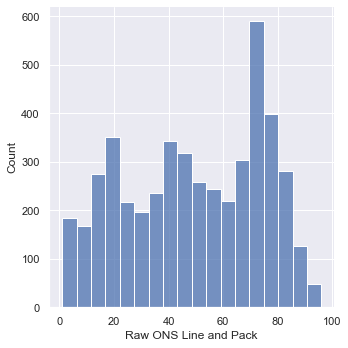

In [19]:
sns.displot(data=df, x='Raw ONS Line and Pack')

It looks like a multi-modal distribution, censored outside the interval $[0, 100]$.

### `Behaviorally - Report 4.18.22[8].xlsx`

This spreadsheet contains a set of reports, on each sheet therein there is an individual "report".
The reports correspond to some time interval, and are indexed with incremented integers.
On each sheet, there is also what looks like a screen shot of some information.
I will include a screenshot of this below:

![](./assets/image1.png)